## Load the libraries and dataset

In [2]:
import warnings
warnings.filterwarnings("ignore")

# derin öğrenme modellerini oluşturmal ve eğitmek için kullanılan kütüphane.
import tensorflow as tf
import numpy as np
import pandas as pd
# grafik oluşturma ve görselleştirmek için kullanılan kütüphane.
import matplotlib.pyplot as plt
#Matplotlib'in grafiklerini doğrudan Jupyter hücrelerinde görüntülemek için kullanılan komut.
%matplotlib inline

In [3]:
# tensorflow keras api'sini kullanarak mnist veri kümesini yükler. Daha sonra train ve test verilerini atar.
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [6]:
# görüntünün görünümü
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

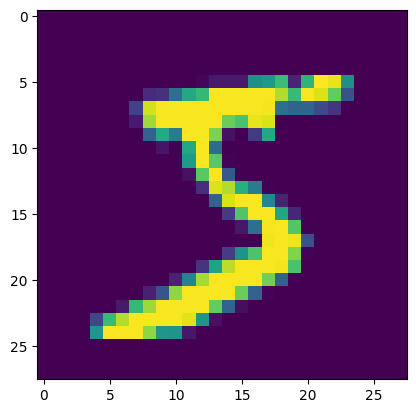

In [7]:
# veriyi görselleştirme.
plt.imshow(X_train[0])

In [8]:
y_train[0]

5

## Normalize the data

In [9]:
# piksel değerleri 0-255 arası, max-min ölçekleyici kullanarak değerleri normalleştirelim
# normalizasyon yapılmasının nedeni, daha küçük aralıklarda(0,1) sinir ağı modellerinin daha hızlı eğitilmesi ve daha iyi performans vermesine yardımcı olur.
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [12]:
# eğitim ve test görüntülerinin boyutlarının yeniden şekllendirilmesi. 2 boyutlu matrsiten(28x28) tek boyutlu vektöre(784) dönüşüm yapılır.
# sinir ağı modelinin daha iyi çalışması için yapılır
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [13]:
# sequential sınııfı, sıralı sinir ağı modeli oluşturmayı sağlar.
from tensorflow.keras.models import Sequential
# tam bağlantılı katman oluşturur.
from tensorflow.keras.layers import Dense

# giriş ve çıkış boyutlarını tanımlayın
input_dims = X_train.shape[1]
output_dims = 10

# sıralı modeli tanımlama, bu model katmanları sıralı bir şekilde bir araya getiren bir konteynırdır.
model = Sequential()

# modele 1. katmanı ekle: 512 nöron 
# sigmoid aktivasyon fonsiyonu: sınıflandırma problemlerinde kullanılan ve 0 ile 1 arasında sürekli bir çıkış üreten bir aktivasyon fonksiyonudur.
model.add(Dense(512, activation="sigmoid", input_shape=(input_dims,), name="Hidden_layer_1"))

# modele 2. katmanı ekle
model.add(Dense(128, activation="sigmoid", name="Hidden_layer_2"))

# çıkış katmanını ekle
model.add(Dense(output_dims, activation="softmax", name="output_layer"))

## Compile a neural network

In [15]:
# RMSprop optimizasyon algoritmasını içe aktarır.
from tensorflow.keras.optimizers import RMSprop

# optimize ediciyi tanımla
optimizer = RMSprop(0.001)

# modeli tamamla
# eğitim süreci için hazır hale getirilir. Bu derleme adımı, modelin belirli bir probleme uygun şekilde eğitilmesini sağlar.
model.compile(loss="binary_crossentropy",optimizer=optimizer,metrics=["accuracy"])

In [16]:
# sinir ağı modelinin eğitimini gerçekleştirir.

# batch_size ve epoch tanıma
batch_size = 128
num_epochs = 20

# sinir ağını eğitme
from keras.utils import to_categorical

# Y_train'in 1 boyutlu bir tam sayı etiketi dizisi olduğunu varsayarsak
y_train_one_hot = to_categorical(y_train, num_classes = output_dims)

# modeli derle
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# modeli eğit
history = model.fit(X_train, y_train_one_hot, validation_split=0.2, epochs=num_epochs, batch_size=batch_size, verbose=1)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7015 - loss: 1.0810 - val_accuracy: 0.9188 - val_loss: 0.2828
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9228 - loss: 0.2665 - val_accuracy: 0.9416 - val_loss: 0.2049
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9403 - loss: 0.2015 - val_accuracy: 0.9532 - val_loss: 0.1689
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9539 - loss: 0.1560 - val_accuracy: 0.9582 - val_loss: 0.1437
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9636 - loss: 0.1231 - val_accuracy: 0.9638 - val_loss: 0.1262
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9704 - loss: 0.1012 - val_accuracy: 0.9665 - val_loss: 0.1175
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9749 - loss: 0.0851 - val_accuracy: 0.9707 - val_loss: 0.1014
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9808 - loss: 0.0667 - val_accuracy

In [17]:
from keras.utils import to_categorical

y_test_one_hot = to_categorical(y_test, num_classes = output_dims)

# modeli değerlendir 
score = model.evaluate(x = X_test, y = y_test_one_hot, verbose = 0)
# modelin ne kadar yanlış tahmin yaptığını ölçer. 0' yakın olmalıdır: 0.07362844794988632
print("Test score:", score[0])
# modelin doğruluğunu ifade eder: 0.9801999926567078
print("Test accuracy:", score[1])

Test score: 0.07139361649751663
Test accuracy: 0.9796000123023987


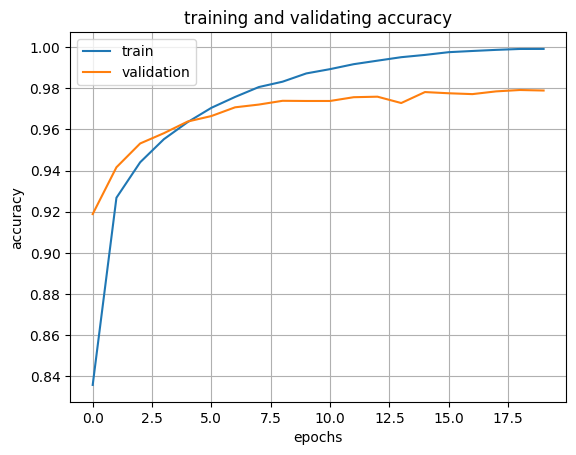

In [18]:
# eğitim doğruluğu ve validasyon doğruluğu
# eğitim doğruluğu: modelin eğitim veri kümesi üzerinde doğru sınısladırılan örneklerin oranını ifade eder.
# modelin eğitim veri kümesine ne kadar iyi uyum sağladığını gösterir.
# validasyon doğruluğu: modelin ayrılmış bir doğrulama veri kümesi üzerinde doğru sınıflandırılan örneklerin oranını verir.
# modelin daha önce görmediği veri üzerinde ne kadar iyi performans gösterdiğini değerlendirir.
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("training and validating accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.legend(["train","validation"])
plt.grid()
plt.show()

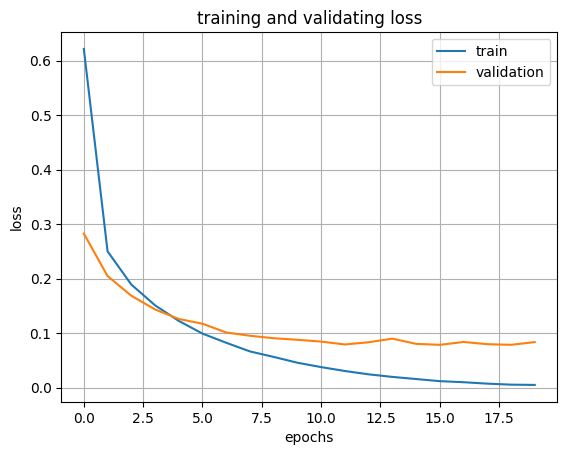

In [19]:
# eğitim kaybı ve validasyon kaybı
# eğitim kaybı: modelin eğitim veri kümesinde yapmış olduğu tahminlerin gerçek etiketlerden ne kadar uzak olduğunu gösterir.
# gerçek etkilerle tahmin edilen etkiler arasındaki farkı ölçer ve bu farkı en aza indirmeye çalışır.
# validasyon kaybı: modelin ayrılmış bir doğrulama veri kümesi üzerinde yapmış olduğu tahminlerin gerçek etiketlerden ne kadar uzak olduğunu ölçer.
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("training and validating loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(["train","validation"])
plt.grid()
plt.show()

In [20]:
y_test[0]

7

In [21]:
# eğitilmiş modeli kullanrak test veri kümesi üzerinde tahminlerde bulunur.
y_pred = model.predict(X_test)
y_pred[:10]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[2.47907437e-08, 1.48409026e-06, 1.64904094e-07, 5.02513467e-06,
        1.67213821e-09, 1.91713423e-09, 1.62569957e-11, 9.99991417e-01,
        3.21359117e-09, 1.86672469e-06],
       [1.16745085e-07, 1.67874696e-05, 9.99976158e-01, 3.88277243e-07,
        8.92373619e-10, 6.46113385e-09, 3.26393717e-07, 5.60099656e-09,
        6.18137437e-06, 8.92074137e-10],
       [5.69841374e-09, 9.99969363e-01, 1.08370359e-05, 4.92056529e-08,
        2.04324962e-07, 7.89714022e-07, 6.39308291e-06, 3.87388263e-06,
        8.20766036e-06, 2.97671534e-07],
       [9.99944806e-01, 7.01023339e-07, 1.71545271e-05, 5.68681031e-08,
        4.24610192e-07, 1.46779016e-07, 2.38673638e-05, 8.60557611e-06,
        8.91951828e-08, 4.12731970e-06],
       [2.43187301e-08, 6.36820516e-08, 2.49135439e-07, 1.63454150e-09,
        9.99992013e-01, 7.56045182e-09, 3.21548555e-07, 2.89229502e-06,
        6.25485654e-08, 4.29913325e-06],
       [2.15198237e-09, 9.99973655e-01, 1.38162576e-07, 1.52788360e-08,
   

In [22]:
#  modelin test veri kümesi üzerindeki tahminlerini daha anlaşılır bir formata dönüştürmek için kullanılır

# modelin test verisi üzerindeki tahminlerini sınıf etiketlerine dönüştürür.
y_pred = np.array([np.argmax(pred) for pred in y_pred])
y_pred[0:10], y_test[0:10]

(array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=int64),
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [23]:
# karmaşıklık matrisi ve sınıflandırma matrisi
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(y_test, y_predict):
    cm = confusion_matrix(y_test, y_predict)
    labels = list(np.unique(y_test))

    # Color Map
    cmap = sns.color_palette()

    # Plot Confusion Matrix
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title("Confusion matrix")
    plt.show()

    print()
    print('-' * 100)
    print("Classification Report: \n", classification_report(y_test, y_predict))
    print('Accuracy Score:', accuracy_score(y_test, y_predict) * 100)


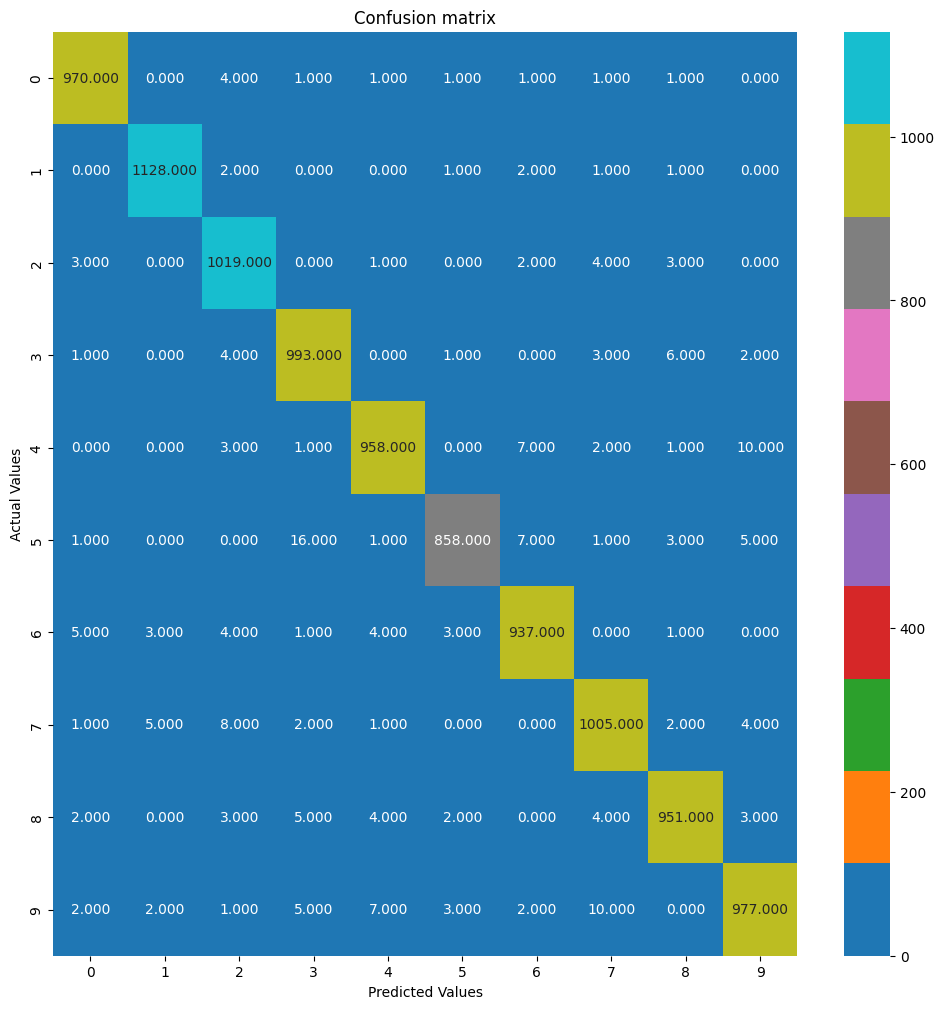


----------------------------------------------------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.97      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.99      0.96      0.97       892
           6       0.98      0.98      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Accuracy Score: 97.96000000000001


In [24]:
plot_confusion_matrix(y_test, y_pred)

### Classification Report
Precision (Hassasiyet): Precision, bir sınıfı doğru bir şekilde tahmin etme oranını ölçer. Precision, True Positives'in (TP) toplam pozitif tahminler (TP + False Positives (FP)) üzerindeki oranını ifade eder. Hassasiyet ne kadar yüksekse, yanlış pozitif tahminler o kadar azdır.

Recall (Duyarlılık): Recall, bir sınıfın ne kadarını doğru bir şekilde tahmin ettiğini ölçer. Recall, True Positives'in (TP) toplam gerçek pozitif örnekler (TP + False Negatives (FN)) üzerindeki oranını ifade eder. Duyarlılık, gerçek pozitiflerin kaçının doğru bir şekilde tahmin edildiğini gösterir.

F1-score: F1-score, hassasiyet ve duyarlılığın harmonik ortalamasını ifade eder. F1-score, hem hassasiyetin hem de duyarlılığın dikkate alındığı bir ölçümdür. F1-score, hem yanlış pozitiflerin hem de yanlış negatiflerin etkisini dengeler.

Support: Support, her bir sınıf için gerçekten kaç tane örnek olduğunu gösterir.

Accuracy (Doğruluk): Accuracy, modelin doğru sınıflandırılan örneklerin toplam örnek sayısına oranını ifade eder. Yani, doğru sınıflandırılan örneklerin tüm örnekler üzerindeki oranıdır.

Raporun sonunda, tüm sınıfların ortalaması olan "macro avg" ve her bir sınıfın ağırlıklı ortalaması olan "weighted avg" da bulunmaktadır. Bu, tüm sınıfların performansının genel performansı temsil etmek üzere bir araya getirilmiş halidir.